# TORCH2ONNX

## 0. Installation

In [ ]:
import os
os.system("pip install --upgrade setuptools pip --user")
os.system("pip install --ignore-installed PyYAML")
os.system("pip install Pillow")
os.system("pip install nvidia-pyindex")
os.system("pip install pycuda")
os.system("pip install protobuf<4.21.3")
os.system("pip install onnxruntime-gpu")
os.system("pip install onnx>=1.9.0")
os.system("pip install onnx-simplifier>=0.3.6 --user")

## 1. Import and Check Dependencies

In [1]:
import sys
import torch
import os
print(f"Python version: {sys.version}, {sys.version_info}")
print(f"PyTorch version: {torch.__version__}")

Python version: 3.6.9 (default, Mar 10 2023, 16:46:00) 
[GCC 8.4.0], sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
PyTorch version: 1.10.0a0+git36449ea


## 2. Download YOLOv7 and valid weight file

In [2]:
os.system("git clone https://github.com/WongKinYiu/yolov7")
os.chdir("yolov7")
os.listdir(os.getcwd())

['data',
 'scripts',
 'README.md',
 'export.py',
 'train.py',
 'models',
 '.git',
 'detect.py',
 'paper',
 'LICENSE.md',
 'requirements.txt',
 'best_tiny_400_16.pt',
 'cfg',
 'hubconf.py',
 'utils',
 'test.py',
 'train_aux.py',
 'figure',
 'inference',
 'deploy',
 '.gitignore',
 'tools']

In [3]:
os.getcwd()

'/home/fuyukawa/IAP/Final_Project/GRIK/build/240607/Convert/yolov7'

In [8]:
os.system("cp ../../Weights/best_tiny_400_16.pt .")
os.system("python3 detect.py --weights ./best_tiny_400_16.pt --conf 0.25 --img-size 640 --source ../../test05.jpg")

0

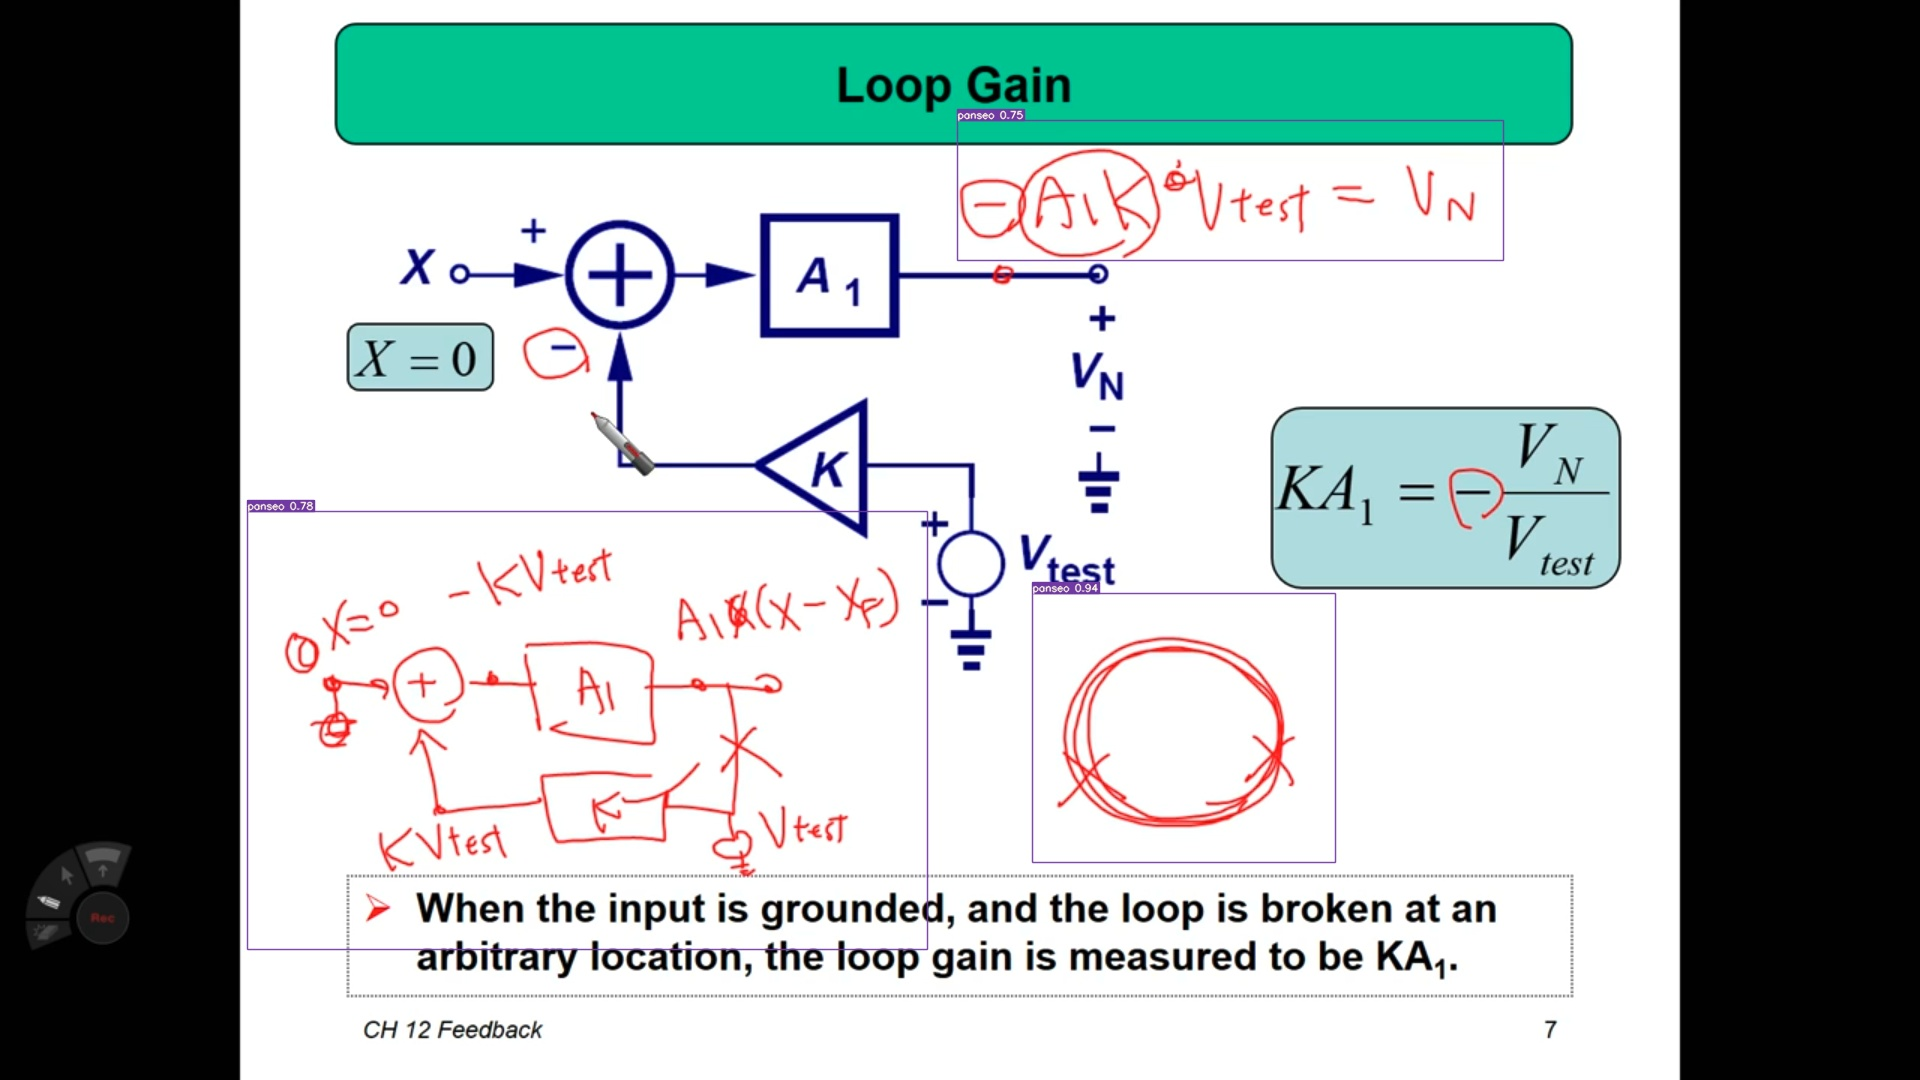

In [9]:
from PIL import Image
Image.open("runs/detect/exp/test05.jpg")

## 3. Export ONNX model

In [ ]:
os.system("python3 export.py --weights ./best_tiny_400_16.pt --grid --end2end --simplify --topk-all 100 --iou-thres 0.65 --conf-thres 0.35 --img-size 640 640")
os.listdir(os.getcwd())

## 4. Save ONNX File at Weight Folder

In [ ]:
os.system("cp ./best_tiny_400_16.onnx ../../Weights")
os.listdir("../../Weights")